This notebook walks through processing the desc 2022 xml file.

The data has been sourced from [nlm website](https://www.nlm.nih.gov/databases/download/mesh.html). 

This is how the website look at the point of our project proposal. 
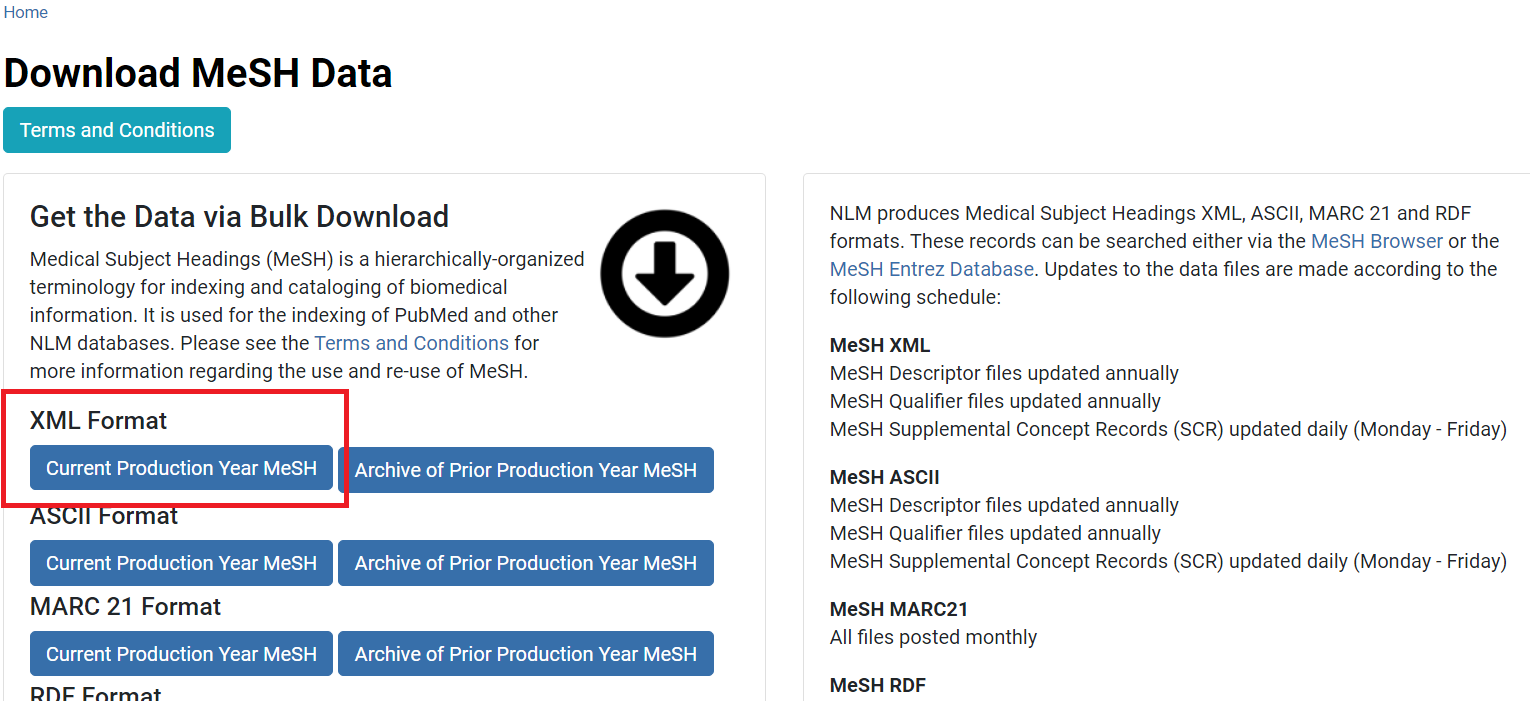

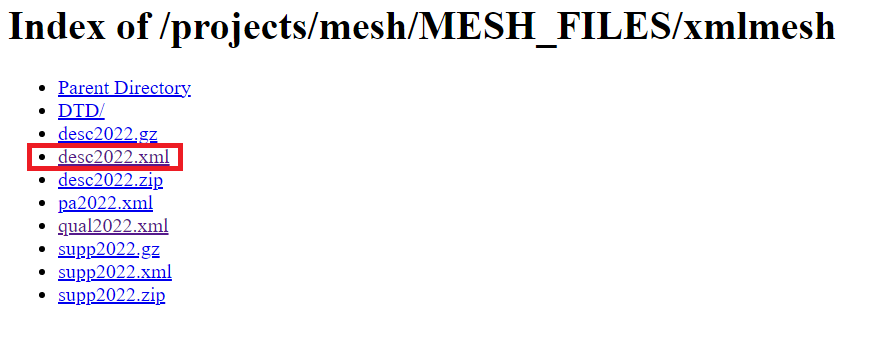

We have uploaded this file to colab notebook. Takes 5-10 mins.

# Parsing XML

In [1]:
from xml.dom import minidom

In [2]:
file = minidom.parse('desc2022.xml')

In [3]:
dr = file.getElementsByTagName('DescriptorRecord')

In [4]:
from tqdm import tqdm_notebook
parsed_data = []
for dr_num in tqdm_notebook(range(len(dr))):
  try:
    iteration_empty_list = []
    for i in dr[dr_num].childNodes:
      if i.nodeName == 'DescriptorUI':
        iteration_empty_list.append(i.firstChild.data)
      if i.nodeName == 'DescriptorName':
        iteration_empty_list.append(i.childNodes[1].childNodes[0].data)
      if i.nodeName == 'TreeNumberList':
        tree_num_list = []
        for k in i.childNodes:
          if k.nodeType == 1:
            tree_num_list.append(k.firstChild.data)
        iteration_empty_list.append(tree_num_list)
    parsed_data.append(iteration_empty_list)
  except:
    print(dr_num)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


  0%|          | 0/30194 [00:00<?, ?it/s]

In [5]:
import pandas as pd
data = pd.DataFrame(parsed_data)

In [9]:
data = data.rename({0 : 'Unique ID', 1: 'Descriptor Name', 2: 'Tree Number'}, axis=1)

In [10]:
data.to_csv('descriptor_mapper.csv',index=False)